In [1]:
from gensim.models.word2vec import Word2Vec
import ast
import pandas as pd
import logging
import time
import re     
#한글 형태소 분석기인 konlpy사용 
#이때 konlpy에는 hannanum, kommoran, kkma, twitter이 있는데 해당 분석에서는 kkma사용
from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.tag import Twitter
#apply lambda사용

import time
#한글 형태소 분석기인 konlpy사용 
#이때 konlpy에는 hannanum, kommoran, kkma, twitter이 있는데 해당 분석에서는 kkma사용
#apply lambda사용
import squarify

# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g
import seaborn as sns
import matplotlib.font_manager as fm
from PIL import Image
from sklearn.cluster import KMeans
import nltk

font_name = fm.FontProperties(fname='C:/windows/Fonts/malgun.ttf').get_name()
plt.rc('font',family =font_name)
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

## 트리맵 출력(wort_to_vector과 관련없음)

In [2]:
squarify.plot(sizes=values, label=keys, alpha=.9,color = colors)
plt.axis('off')
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15, 15)
plt.show()
plt.rc('font',size=25)

NameError: name 'values' is not defined

In [ ]:
a= {'언니': 7444, '진짜': 4846, '영상': 3579,  '오늘': 1370, '보고': 1250, '사랑': 1098, '메이크업': 1025, '정말': 881, '항상': 772, '옷': 728, '피부': 720, '완전': 676, '생각': 651, '사람': 647, '화장': 600, '제품': 597, '느낌': 567, '이번': 495, '말': 485, '요즘': 478,'젤라': 458, '정보': 450, '대박': 440, '얼굴': 436, '그냥': 433,  '하나': 430, '머리': 419,'추천': 409}

In [ ]:
values = a.values()
values

In [ ]:
keys = a.keys()
keys

In [ ]:
data = pd.DataFrame({'키워드':aa,'빈도수':bb})

In [ ]:
aa=  list(keys)
bb = list(values)

In [ ]:

dataGoals= data[data['빈도수']>500]
norm = matplotlib.colors.Normalize(vmin=min(dataGoals.빈도수), vmax=max(dataGoals.빈도수))
colors =  [matplotlib.cm.Blues(norm(value)) for value in dataGoals.빈도수]

In [ ]:
norm = matplotlib.colors.Normalize(vmin=min(dataGoals.G), vmax=max(dataGoals.G))

## 여기부터 Word_To_Vector시작

In [2]:
df = pd.read_csv('뷰티리스트.csv',encoding='cp949')
name_list = df['이름'].values
name_list

All_file = []
for name in name_list:
# 각 이름에 맞는 info 파일 불러와서 데이터프레임에 저장
    df = pd.read_csv(f'{name}/result.csv')
    All_file.append(df)
    
    dataCombine = pd.concat(All_file,axis =0, ignore_index = True)

    dataCombine.to_csv('testword_Beauty.csv', index = False)
    

In [3]:
comment_data = pd.read_csv('testword_Beauty.csv')
comment_data

,닉네임,댓글,좋아요수,날짜
0,요호요호,점포아니고 전포인뎅ㅋㅋㅋㅋㅋ편집자분 부산분 아니신가봐용ㅋㅋㅋ 오늘도 재미나게보겠습니당❤,549개,2020. 5. 30.
1,77ml,서울사람 입니다.\n쨔미쓰님들과 같은 우리 동년배들 그 모자 많이 씁니다. 모자 아...,353개,2020. 5. 30.
2,z은지,서울사람이지만 캡모자를 훨씬더 쓰는 느낌적인 느낌ㅋㅋㅋㅋ,34개,2020. 5. 30.
3,KIARA키아라,아니 왜 아무도 0:24 여기 나오는 벨소리 언급을 안해요? 어이없게 웃기잖앜ㅋㅋㅋ...,218개,2020. 5. 30.
4,서울,저 모자..쌩얼 모자... 화장안하고 머리 안감았을 때 마스크랑 저모자쓰면 면상을 ...,7개,2020. 5. 30.
...,...,...,...,...
22803,Queenofthorns,Omgg💜 ME ENCANTO EL VIDEOOO😭llegué tarde:( Per...,0개,2020. 4. 10.
22804,FabiolaPalacios,"Me encanto como quedo tu maquillaje 😻, ademas ...",0개,2020. 4. 10.
22805,CarolinaGri,Me encanta tu voz en español y coreano❤️❤️❤️ t...,0개,2020. 4. 10.
22806,JuranyMuozMartinez,Me encantas tus videos especialmente los de es...,0개,2020. 4. 10.


In [4]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [5]:
# 댓글만 출력해서 리스트에 저장
comment_list = []
for i in range(len(comment_data)):
    comment_list.append(comment_data['댓글'].iloc[i])
comment_result = []

# 토큰작업
for i in comment_list:
    tokens = re.sub(emoji_pattern,"",i)
    tokens = re.sub(han,"",tokens)
    comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])

# 댓글중에서 명사인 단어만 추출하는 함수생성
def get_noun(comment_txt):
    twitter = Twitter()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i) #명사인 단어만 추출
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))
comment_result.head()

C:\Users\acorn\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


,comment,token
0,점포아니고 전포인뎅편집자분 부산분 아니신가봐용 오늘도 재미나게보겠습니당❤,"[점포, 포, 뎅, 편집자, 부산, 오늘, 재미나, 습]"
1,서울사람 입니다쨔미쓰님들과 같은 우리 동년배들 그 모자 많이 씁니다 모자 아주 예쁩니댜,"[서울, 사람, 쨔미쓰님, 우리, 동년배, 그, 모자, 모자, 아주, 댜]"
2,서울사람이지만 캡모자를 훨씬더 쓰는 느낌적인 느낌,"[사람, 캡, 모자, 더, 느낌, 느낌]"
3,아니 왜 아무도 0:24 여기 나오는 벨소리 언급을 안해요 어이없게 웃기잖앜아닠,"[왜, 아무, 여기, 벨소리, 언급, 안해, 앜아닠]"
4,저 모자쌩얼 모자 화장안하고 머리 안감았을 때 마스크랑 저모자쓰면 면상을 완벽하게 ...,"[저, 모자, 쌩얼, 모자, 화장, 안, 머리, 때, 마스크, 모자, 면상, 가요]"


In [6]:
# Vec화 작업
vec = []
for i in range(len(comment_result)):
    vec2 = []
    tm_ls = comment_result['token'].iloc[i]
    if len(tm_ls) == 0: #비어있는 리스트 삭제
        pass
    else:
        for j in range(len(tm_ls)): #비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
            if len(tm_ls[j]) > 1:
                vec2.append(tm_ls[j])
            else:
                pass
    if len(vec2) == 0:
        pass
    else:
        vec.append(vec2)
vec

[['점포', '편집자', '부산', '오늘', '재미나'],
 ['서울', '사람', '쨔미쓰님', '우리', '동년배', '모자', '모자', '아주'],
 ['사람', '모자', '느낌', '느낌'],
 ['아무', '여기', '벨소리', '언급', '안해', '앜아닠'],
 ['모자', '쌩얼', '모자', '화장', '머리', '마스크', '모자', '면상', '가요'],
 ['휴대폰',
  '벨소리',
  '제대로',
  '건가',
  '뭔가',
  '팝송',
  '최고',
  '앜쿠',
  '미역',
  '생일',
  '미역국',
  '해먹',
  '장수',
  '미역',
  '일부러',
  '마음',
  '미역국',
  '간도',
  '는걸',
  '엄마',
  '최고',
  '이유',
  '미역국',
  '가득',
  '이유',
  '언니',
  '의식',
  '흐름',
  '아잌',
  '자세',
  '유튜버',
  '세상',
  '무슨',
  '소리',
  '마늘',
  '마늘',
  '와우',
  '깜짝',
  '이르케',
  '언니',
  '진짜',
  '그대',
  '언니',
  '유튜버',
  '행동',
  '위안'],
 ['정말', '이서', '수가', '생일', '축하'],
 ['역시', '여자', '우정', '최고', '쨔미쓰', '오래오래'],
 ['역시', '쨔미쓰', '오디오'],
 ['쨔미쓰'],
 ['은정', '모자', '자주', '이상', '경상도', '독자'],
 ['서울', '모자', '사람', '못못봣', '그래듀'],
 ['쨔미쓰언', '모자', '하루', '몇번', '안심'],
 ['첨부', '진짴케'],
 ['서울', '사람', '모자', '귀여웡'],
 ['진짜', '쨔미스', '노래', '제일', '좋앜'],
 ['사람', '모자'],
 ['모자'],
 ['역시', '화장'],
 ['미스'],
 ['쨔미쓰', '케미', '벌써', '재밋어'],
 ['쨔미쓰', '만이', '역시', '쨔미쓰', '효진',

## word2vec
- 중심단어와 주변단어 벡터의 내적이 코사인 유사도가 되도록 단어를 벡터
    공간에 임베딩(배치) 한다.

- min_count  = 몇 이하로 등장하는 단어 제외
- workers = 몇코어 쓸건지
- iter = 몇번 학습하라는건지
- window =  주변의 단어를 몇개로 볼것인지 
- size = 몇차원으로 할것인지 
- 학습 차원의 크기
일반적으로 100-300을 사용한다. 최소한의 정확도를 얻기 위해서는 50차원 이상은 사용해야한다고 생각한다. 만약 적은 차원을 선택하면 많은 차원에서 얻을 수 있는 특성들을 잃게될 수 있다. 훈련시간이 크게 중요하지 않다면 200차원을 권한다. 최상의 정확도는 300차원에서 얻어진다. 300차원 이상이면 학습시간이 늘어나는 것에 비해서 얻어지는 향상은 미미하다.

In [29]:
model = Word2Vec(vec, min_count=10,window=6,iter=50, size=200, sg=1) #skip-gram

model.wv.syn0.shape #w2v size  -> 45개의 단어가 200차원을 가지고 있음

C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(1777, 200)

In [30]:
#45개의 단어가 200차원으로 벡터화된 수치를 넣어줌
word_vectors = model.wv.syn0 # model.wv.vectors와 같은 값을 가짐
word_vectors

C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


array([[-0.05495226, -0.26606223, -0.12622884, ...,  0.05265101,
        -0.13015576, -0.11903055],
       [-0.0775358 , -0.20880201, -0.04585509, ...,  0.02222508,
        -0.15262948,  0.20945673],
       [-0.04340607, -0.36366102, -0.20950122, ...,  0.09776399,
         0.00767323, -0.00584228],
       ...,
       [-0.30204734, -0.2063063 ,  0.14089192, ...,  0.07326736,
        -0.25781175,  0.21313411],
       [ 0.08541506, -0.29637468, -0.36453146, ..., -0.06435288,
        -0.2794444 , -0.14115348],
       [ 0.11318072,  0.10581037, -0.10008875, ..., -0.14233468,
         0.00122078, -0.5060546 ]], dtype=float32)

In [31]:
num_clusters = 6 #cluster의 갯수 산정
kmeans_clustering = KMeans( n_clusters = num_clusters )#default
idx = kmeans_clustering.fit_predict( word_vectors ) #각 단어가 어떤 군집에 속하는지 확인
idx

array([4, 4, 5, ..., 0, 4, 0])

In [32]:
# 각 어휘 단어를 클러스터 번호에 매핑되게 word/Index 사전을 만든다.
idx = list(idx)
names = model.wv.index2word #학습된 단어들 unique
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}#각 단어 별로 클러스터 번호에 매칭
print(names)

['언니', '진짜', '영상', '오늘', '보고', '사랑', '메이크업', '정말', '항상', '피부', '완전', '생각', '사람', '화장', '제품', '느낌', '이번', '요즘', '젤라', '정보', '대박', '얼굴', '그냥', '하나', '머리', '추천', '효진', '한번', '최고', '역시', '지금', '회사원', '처음', '찰떡', '코로나', '힐링', '댓글', '우리', '이벤트', '브랜드', '구매', '뭔가', '씬님', '사배', '혹시', '바로', '광고', '브이', '세상', '슈스스', '마음', '로그', '때문', '기분', '사용', '썸네일', '계속', '응원', '렌즈', '제일', '컨텐츠', '고민', '컬러', '엄마', '이제', '다시', '축하', '마스크', '그림', '취향', '생일', '스타일', '어디', '모습', '뷰티', '쿠션', '가요', '노래', '화장품', '소개', '투쿨', '시간', '매력', '이름', '다음', '자주', '한별', '커버', '제발', '다른', '정도', '헤이즐', '당첨', '자체', '참여', '마지막', '앞머리', '부분', '가격', '친구', '가방', '설화수', '속옷', '인스타', '리뷰', '시작', '팔레트', '유튜브', '조합', '원래', '보기', '무슨', '여기', '존예', '유튜버', '하이', '라뮤끄님', '패션', '텐션', '코디', '설명', '남자', '향수', '추억', '채널', '작품', '아이', '분위기', '미모', '목소리', '구독', '썸넬', '인생', '샴푸', '자켓', '덕분', '편집', '이건', '당신', '여름', '패드', '선물', '공주', '나중', '파우더', '진심', '언제', '헤어', '약간', '섀도우', '해도', '유나', '하루', '사고', '원피스', '주님', '소리', '박스', '일이', '관리', '조금', '건가', 

In [33]:
for cluster in range(0,6):
    # 클러스터 번호를 출력
    print("\nCluster {}".format(cluster))
    
    # 클러스터번호와 클러스터에 있는 단어를 찍는다.
    words = []
    for i in range(0,len(list(word_centroid_map.values()))): #list(dict)키 값만 리스트로 반환
        #list(dict.values)는 value값이 리스트로 반환
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


Cluster 0
['브랜드', '슈스스', '취향', '스타일', '어디', '소개', '가방', '여기', '패션', '코디', '남자', '자켓', '원피스', '센스', '하울', '디자인', '저런', '스타', '누나', '명품', '소화', '지갑', '베이비', '신발', '슈스', '스님', '일링', '옷장', '문초', '오로라', '여자', '고급', '모델', '도전', '스카프', '샤넬', '슈펜', '모자', '일루', '바지', '선셋', '아이템', '사이즈', '디자이너', '포인트', '새내기', '활용', '매장', '셔츠', '트루', '로퍼', '제이', '다리', '수트', '베이직', '슈스스님', '청바지', '매치', '화이트', '재킷', '협찬', '어머', '개인', '큐영', '데님', '알림', '면서', '한혜연', '쟈니', '고물', '맛집', '유행', '의상', '두번째', '발리', '스탈', '이미지', '가슴', '도영', '에르메스', '콘텐츠', '길이', '기본', '리스트', '디테일', '목걸이', '등장', '한철', '어어', '어깨', '호강', '재질', '쏙쏙', '티셔츠', '스커트', '루이비통', '흰색', '니트', '여성', '슈스스언', '허리', '기절', '재현', '귀염', '지고', '가죽', '사면', '남성', '로망', '유니크', '운동화', '욕구', '심플', '디테', '전선', '마이크', '반응', '미니', '웁니', '체크', '엘지', '쇼핑몰', '대충', '슈즈', '김도영', '일루젼', '가디건', '버전', '가타', '선댓', '블라우스', '반바지', '직장인', '소녀', '구찌', '신고', '룩북', '검정', '저리', '의사', '파괴', '클래식', '십대', '슈트', '미팅', '안목', '가구', '머리띠', '무난', '혜연님', '로렌', '버스', '오메', '보임', '악세사리', '패턴', '저

In [34]:
# 현재 작업하는 클러스터의 모델명 지정 및 저장
model_name = 'Beaut_M_5W_5'
model.save(model_name)

mpl.rcParams['axes.unicode_minus'] = False
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]
print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

1777
[-0.14266536 -0.25545338 -0.22110282 -0.13485685  0.60664517  0.33263326
 -0.07742463 -0.26543805  0.6425565  -0.02109526]


C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [35]:
# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [36]:
df.head(10)

,x,y
편집자,-14.731298,-108.738945
부산,9.495337,-38.439209
오늘,12.460181,12.144642
서울,23.857346,66.479485
사람,-48.092190,-6.701845
우리,-27.121244,-44.473938
동년배,-47.021202,-28.731462
모자,-125.828613,-80.564339
아주,-24.614920,-68.716599
느낌,20.640928,-20.342354


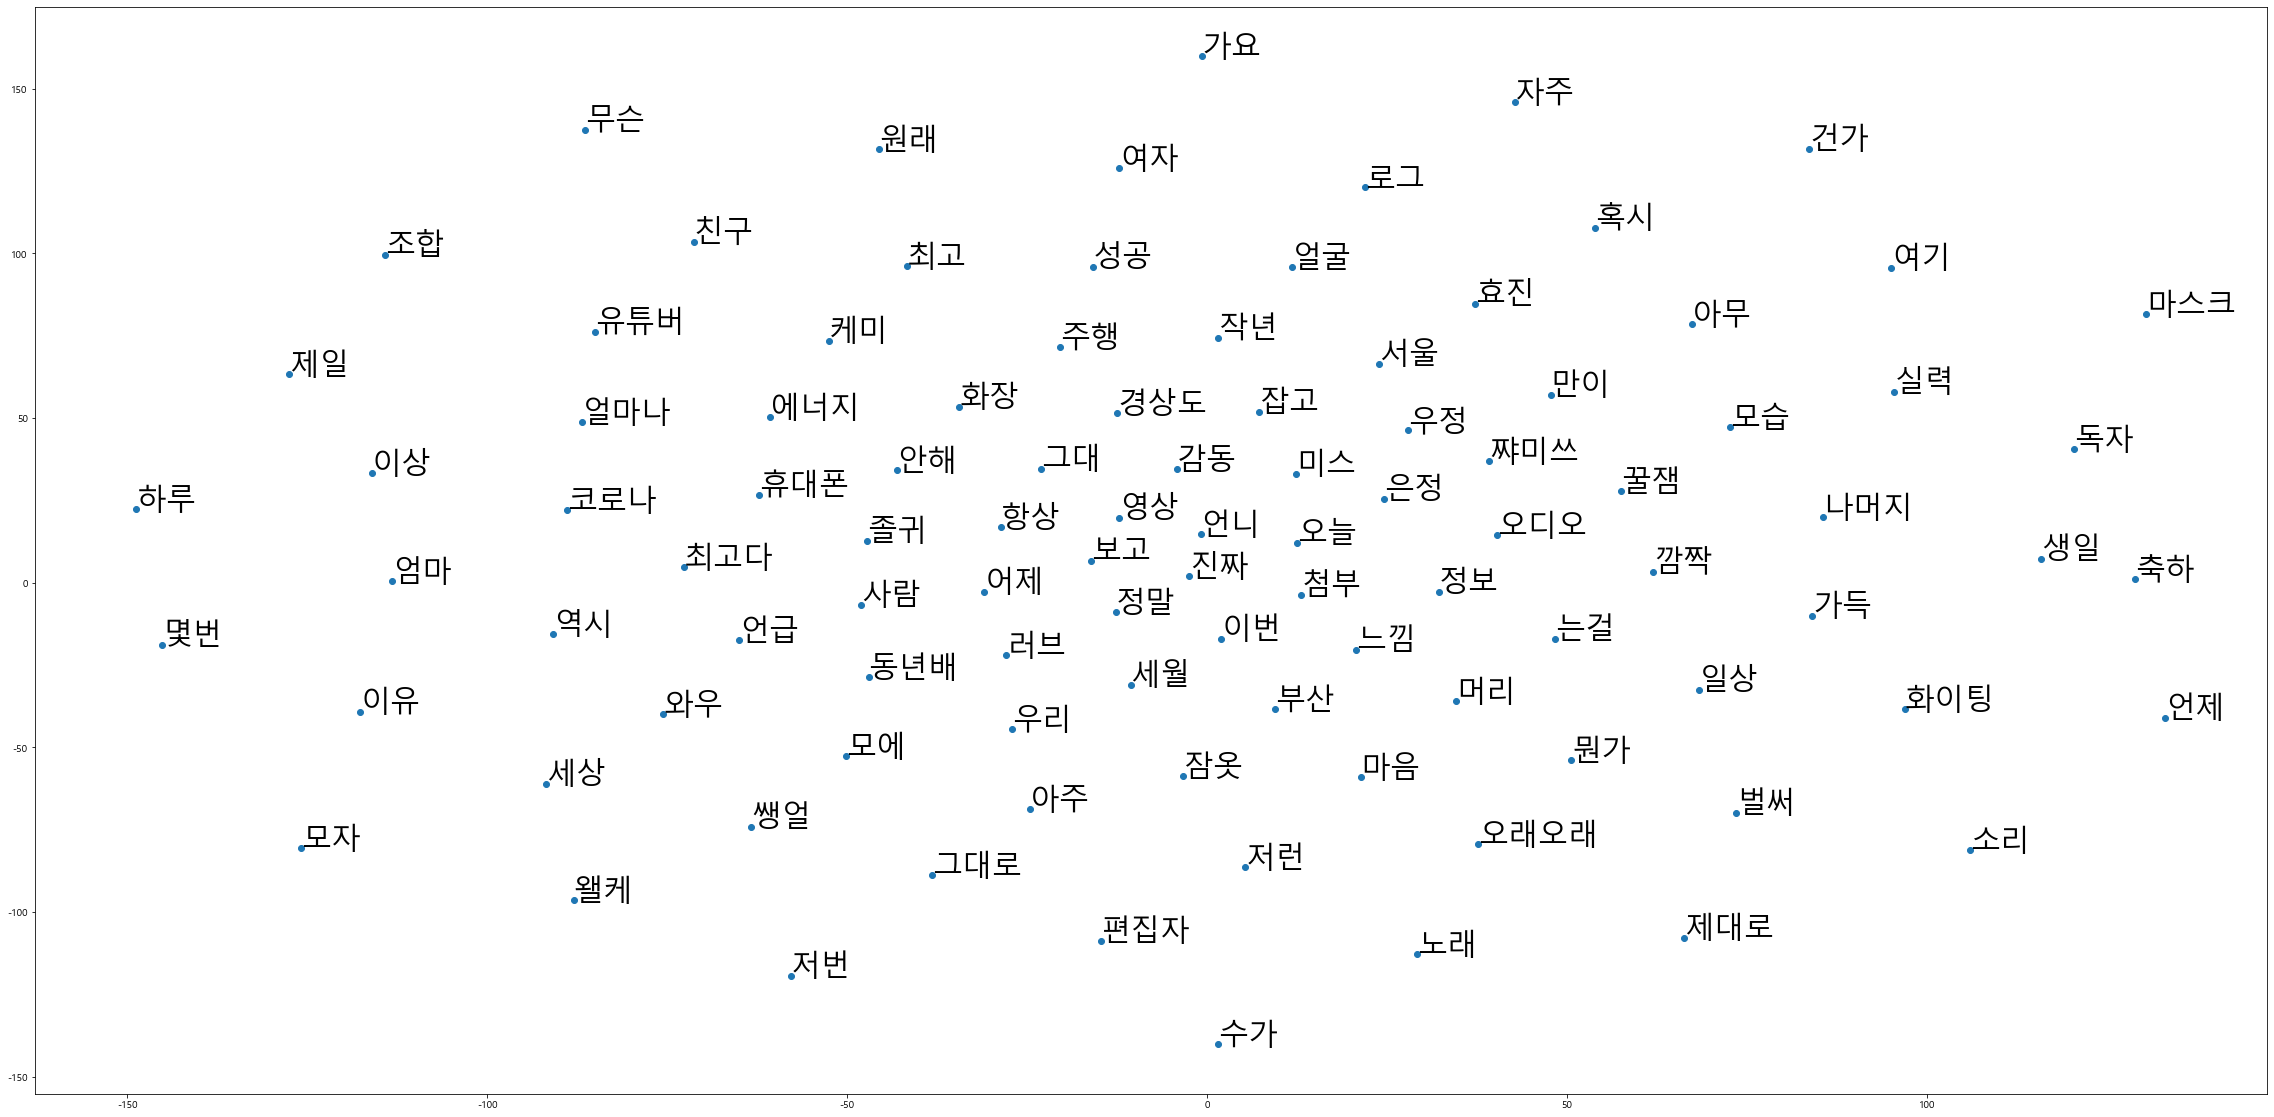

In [37]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [38]:
# 150개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:150,:])
# X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab[:150], columns=['x', 'y'])
df.shape

(150, 2)

In [39]:
df.head(10)

,x,y
편집자,-284.276367,-93.509537
부산,50.584976,-126.939575
오늘,49.027336,-49.197445
서울,113.023773,-152.166519
사람,-70.869392,-76.570244
우리,-111.775917,-199.532898
동년배,-27.516903,96.235252
모자,-368.817108,230.161423
아주,-29.208359,-492.654388
느낌,61.110535,16.051889


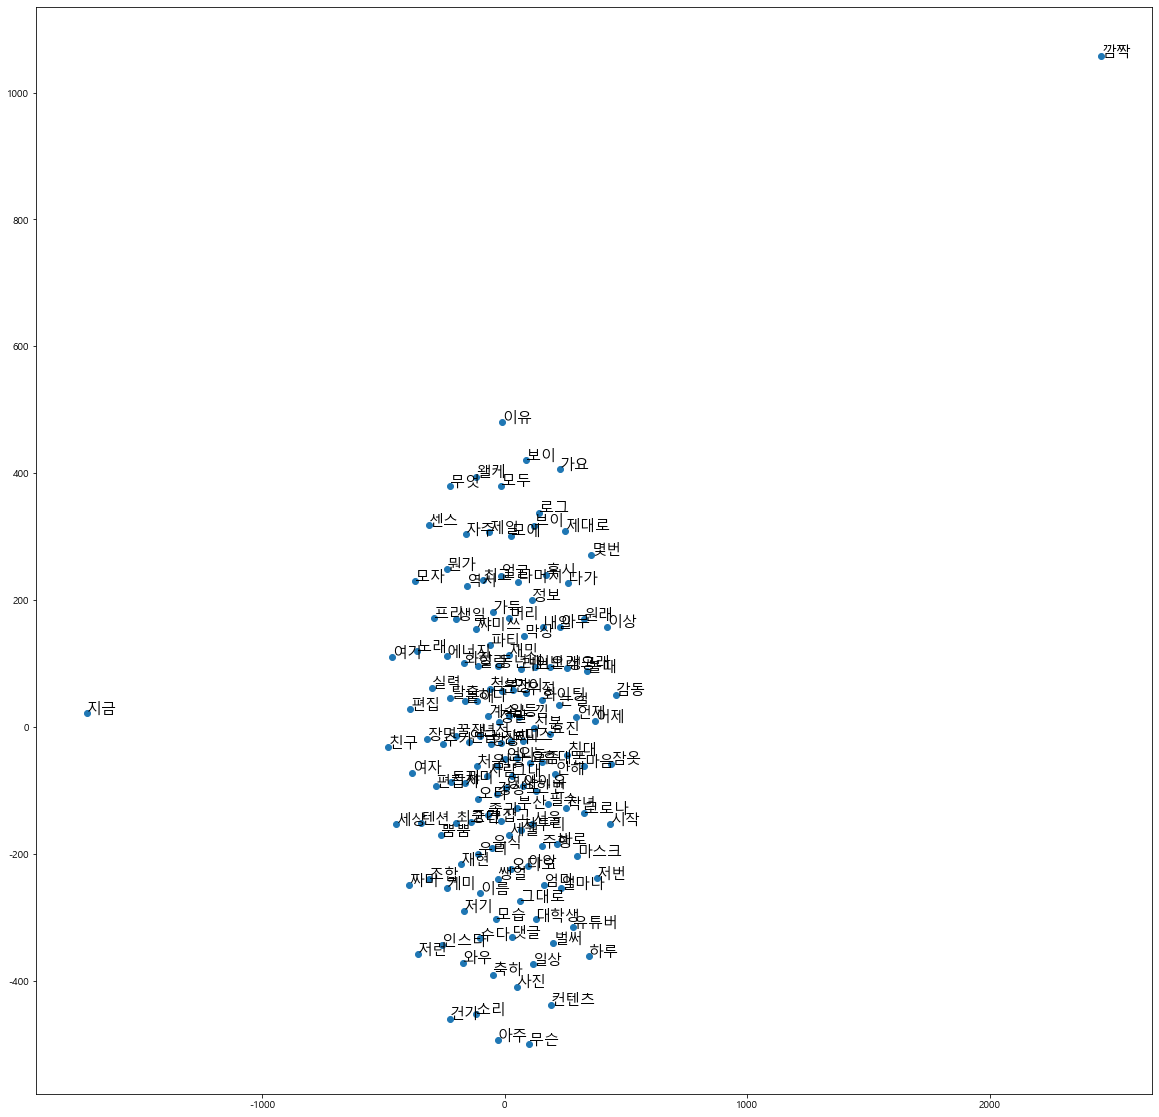

In [46]:
fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=15)
plt.show()

In [41]:
model.most_similar('화장품')

C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('청소', 0.3153342008590698),
 ('클렌징', 0.31034091114997864),
 ('화장실', 0.3046790361404419),
 ('살때', 0.30039578676223755),
 ('인물', 0.2868753671646118),
 ('우선', 0.2859418988227844),
 ('기초', 0.28347471356391907),
 ('클렌', 0.28204941749572754),
 ('체험', 0.2784534990787506),
 ('교수', 0.27729037404060364)]

In [42]:
model.most_similar('파운데이션')

C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('설화수', 0.6631145477294922),
 ('퍼펙팅', 0.6057893633842468),
 ('샘플', 0.5627191066741943),
 ('스파', 0.5155293941497803),
 ('체험', 0.5070205926895142),
 ('정착', 0.4259614944458008),
 ('스펀지', 0.39314642548561096),
 ('복합', 0.3797057569026947),
 ('로션', 0.3796755075454712),
 ('에스', 0.37908244132995605)]

In [43]:
model.most_similar(positive = ["추천","스타일"])[:15]

C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('리스트', 0.33347174525260925),
 ('특집', 0.3262587785720825),
 ('신세계', 0.3236424922943115),
 ('루나', 0.3109622597694397),
 ('버스', 0.3066670000553131),
 ('저렴', 0.30642199516296387),
 ('내추럴', 0.30329254269599915),
 ('겟레디윗미', 0.298393577337265),
 ('시즌', 0.2959095239639282),
 ('젠더리스', 0.2955663204193115)]

In [31]:
model.similarity('아이폰', '디자인')

C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.30283165